
# THE SPARKS FOUNDATION

## Data Science and Business Analytics Intern - September 2021

### Task 5: Exploratory Data Analysis - Sports
  
**`Problem Statement:`**
- Perform EDA on dataset 'Indian Premier League'.
- Find most successful teams, players and factors contributing win or lose of a team.
- Suggest teams or players a company should endorse for its products.


***By MAMATHA E***

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#!unzip '/content/drive/MyDrive/Colab Notebooks/Indian Premier League.zip' -d '/content/drive/MyDrive/Colab Notebooks'

#### Understading the 1st Dataset matches.csv

In [4]:
# Loading the dataset
match = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/matches.csv')
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# Checking the dataset shape
match.shape

(756, 18)

In [6]:
# View statistical information about the dataset
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
# Information of the dataset
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#### Data Cleaning

In [8]:
# Checking values in 'dl_applied' column
match.dl_applied.value_counts()

0    737
1     19
Name: dl_applied, dtype: int64

'dl_applied' is a categorical variable so changing the datatype of it from 'int64' to 'object'.

In [9]:
# Changing the data type of 'dl_applied' and viewing the changes
match.dl_applied = match.dl_applied.astype('object')
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    object
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

**Handling & Treating Missing Values**

In [10]:
# Checking the % of null values present in each column
match.isnull().sum()/match.shape[0]*100

id                  0.000000
season              0.000000
city                0.925926
date                0.000000
team1               0.000000
team2               0.000000
toss_winner         0.000000
toss_decision       0.000000
result              0.000000
dl_applied          0.000000
winner              0.529101
win_by_runs         0.000000
win_by_wickets      0.000000
player_of_match     0.529101
venue               0.000000
umpire1             0.264550
umpire2             0.264550
umpire3            84.259259
dtype: float64

`Inferences:` 
- 'umpire3' is having about 84% of missing values so the column will be dropped.
- 'city', 'winner', 'player_of_match', 'umpire1', and 'umpire2' are having less than 1% of missing values. These will be handled by imputing them with meaningful values.

In [11]:
# Dropping columns having about 80% of missing values
match.drop(match.columns[match.isnull().sum()/match.shape[0]*100>80].tolist(),axis = 1, inplace = True)
match.shape

(756, 17)

In [12]:
# Checking the winner count
match.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

Treating missing values for columns having less % of missing values.

In [13]:
match[match.winner.isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


**`Inferences:`** 

- As it can be seen from the output, whenever the value of 'result column is 'no result' then the 'winner' and 'player_of_match' column is having null value. 
- 'no result' in result column might be because of match not being completed in the specified time duration.
- The resaons for this may be weather conditions or light interrupts.
- So let the null value be filled with some meaningful value like 'Incomplete Match' for 'winner' and 'player_of_match' column.

In [14]:
# Imputing the missing values for 'winner' and 'player_of_match'
match.winner = match.winner.fillna('In-complete Match')
match.player_of_match = match.player_of_match.fillna('In-complete Match')

In [15]:
match[match.player_of_match.isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [16]:
# Viewing rows having null values in 'umpire1'
match[match.umpire1.isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


**`Inference: `** It looks like there is no information available for umpire1 and umpire2 so imputing them as 'Unknown'.

In [17]:
# Imputing the missing values for 'umpire1' and 'umpire2'
match.umpire1 = match.umpire1.fillna('Unknown')
match.umpire2 = match.umpire2.fillna('Unknown')

In [18]:
match[match.umpire1.isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [19]:
match[match.city.isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus


**`Inference:`** From the above output, after viewing the 'venue' column, the null value for the 'city' column can be filled with value 'Dubai'.

In [20]:
# Filling null values for 'city' as 'Dubai
match.city.fillna('Dubai', inplace=True)

In [21]:
match[match.city.isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2


In [22]:
# Checking for missing values again
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    object
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  756 non-null    object
 14  venue            756 non-null    object
 15  umpire1          756 non-null    object
 16  umpire2          756 non-null    object
dtypes: int64(4), object(13)
memory usag

In [23]:
# Checking the name of the cities for repeatition
print(match.city.nunique())
match.city.unique()

33


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

In [24]:
# Replacing 'Bangalore' with 'Bengaluru' as 'Bengaluru' is the updated city name
match.city.replace({'Bangalore': 'Bengaluru'}, inplace = True)

In [25]:
print(match.city.nunique())
match.city.unique()

32


array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [26]:
match.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

From the above output, some of the values in team1, team2 and winner are repeated so changing it.

In [27]:
# Replacing 'Rising Pune Supergiants' as 'Rising Pune Supergiant', 'Delhi Daredevils' as 'Delhi Capitals'
match.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'}, inplace = True)
match.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'}, inplace = True)
match.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'}, inplace = True)

In [28]:
match.team1.nunique()

13

**Highly Skewed Columns**

In [29]:
match.dl_applied.value_counts()/match.shape[0]

0    0.974868
1    0.025132
Name: dl_applied, dtype: float64

In [30]:
match.result.value_counts()/match.shape[0]

normal       0.982804
tie          0.011905
no result    0.005291
Name: result, dtype: float64

Highly skewed columns:
1. result - 0.984
2. dl_applied - 0.982

Since above columns are highly skewed they can be dropped.

In [31]:
match.drop(['result', 'dl_applied'], axis=1, inplace =True)
match.shape

(756, 15)

#### Visualisation of 'matches.csv' Dataset:

In [32]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   winner           756 non-null    object
 9   win_by_runs      756 non-null    int64 
 10  win_by_wickets   756 non-null    int64 
 11  player_of_match  756 non-null    object
 12  venue            756 non-null    object
 13  umpire1          756 non-null    object
 14  umpire2          756 non-null    object
dtypes: int64(4), object(11)
memory usage: 88.7+ KB


**Handling and Treating Outliers**

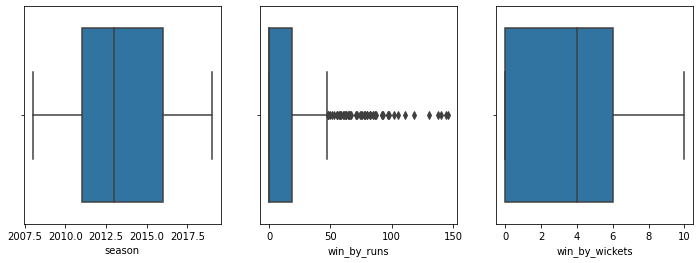

In [33]:
# Checking for outliers in numerical variables
num_var = ['season', 'win_by_runs', 'win_by_wickets']
plt.figure(figsize= [12,4])
for i in range(len(num_var)):
  plt.subplot(1, 3, i+1)
  sns.boxplot(match[num_var[i]])
plt.show()

`Inference:` There are outliers only in 'win_by_runs' column which can be handled using capping method.

In [34]:
# Capping 'win_by_runs' to 95th percentile
q = match.win_by_runs.quantile(0.99)
match.win_by_runs[ match.win_by_runs >= q] = q

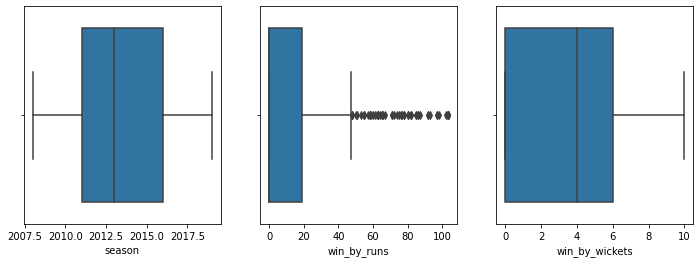

In [35]:
# Re-checking for outliers in numerical variables
plt.figure(figsize= [12,4])
for i in range(len(num_var)):
  plt.subplot(1, 3, i+1)
  sns.boxplot(match[num_var[i]])
plt.show()

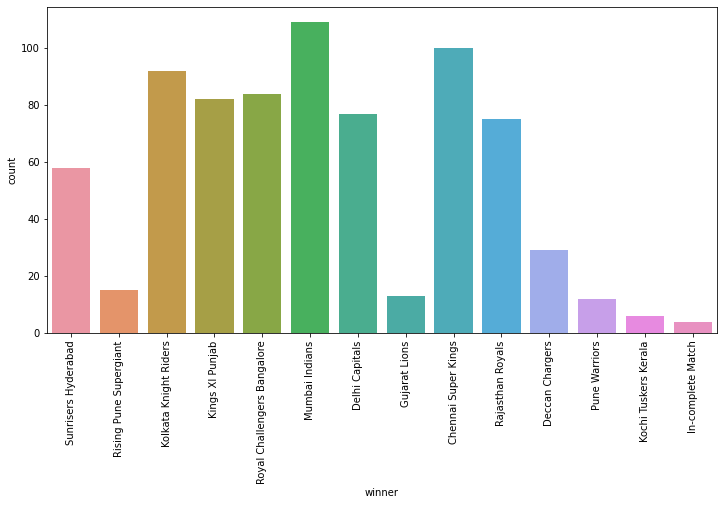

In [36]:
# number of matches won by a team
plt.figure(figsize= [12,6])
sns.countplot(data=match, x = 'winner')
plt.xticks(rotation=90)
plt.show()

`Inferences:`
- Maximum matches won by a team (Top 3):
  1. Mumbai Indians
  2. Chennai Suer Kings
  3. Kolkata Knight Riders
- Maximum matches won by a team (Bottom 3 and considering only completed match):
  1. Kochi Tuskers Kerala
  2. Pune Warriors
  3. Gujarat Lions

In [37]:
# Finding the number of matches won by the team who also won the toss
df = match[match.toss_winner == match.winner]
df.shape

(355, 15)

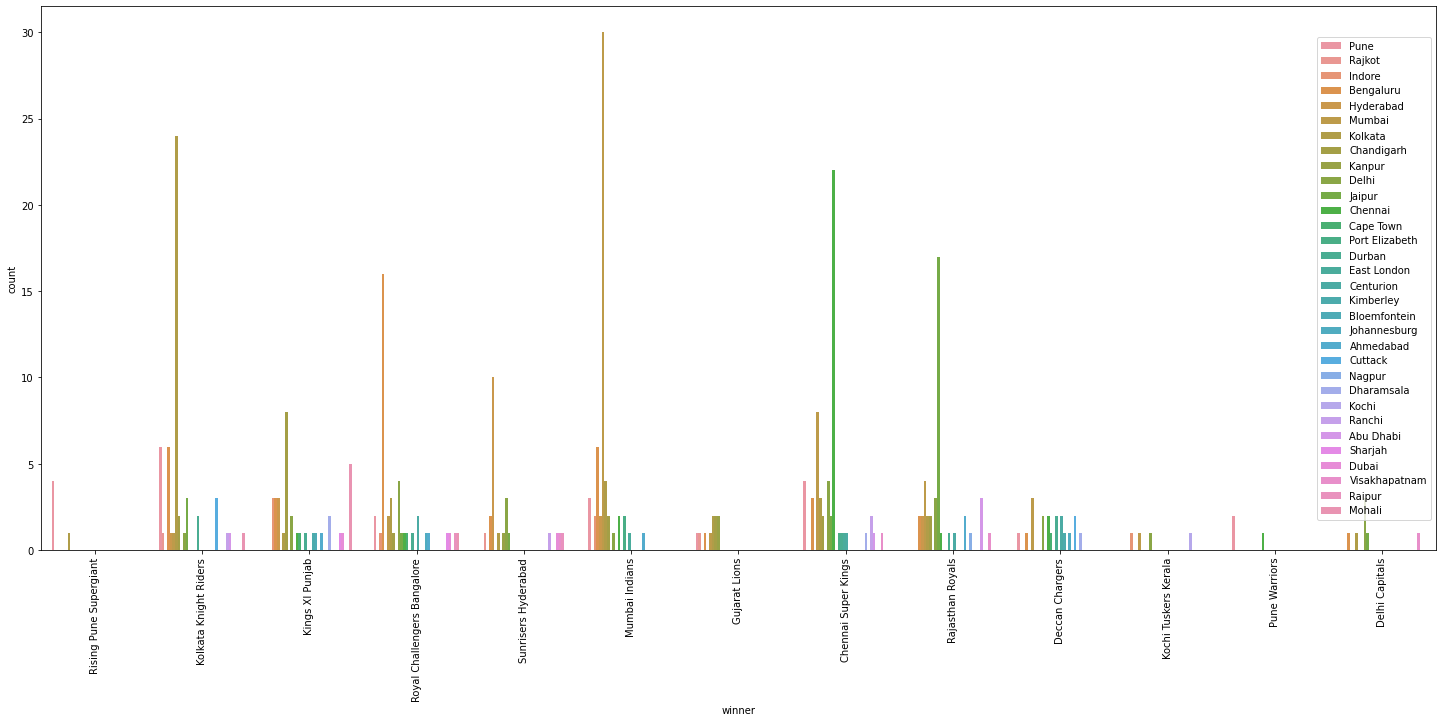

In [38]:
# Plotting the number of matches won by a team in comparison with toss_decision
plt.figure(figsize= [25,10])
sns.countplot(data = df, x='winner', hue= 'city')
plt.xticks(rotation = 90)
plt.legend(loc = 'right')
plt.show()

`Inference:` It looks like teams playing in their home ground have slightly higher chances to win.


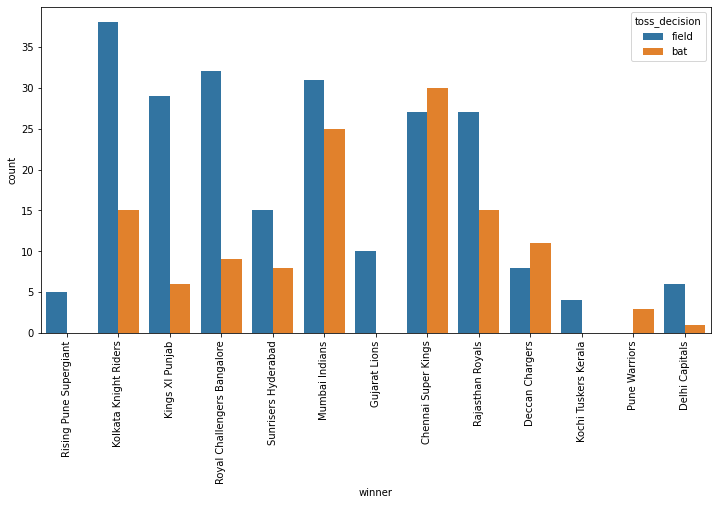

In [39]:
# Plotting the number of matches won by a team in comparison with toss_decision
plt.figure(figsize= [12,6])
sns.countplot(data = df, x='winner', hue= 'toss_decision')
plt.xticks(rotation = 90)
plt.show()

`Inferences:`
- There are total of 355 matches where in the toss winner has won the match.
- From the above plot, out of these 355 matches, most have them have won when the team decided to field when compared to bat.

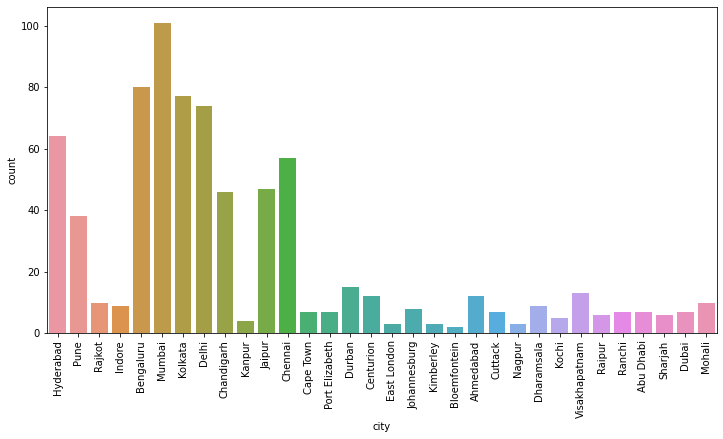

In [40]:
# number of matches played in a city
plt.figure(figsize= [12,6])
sns.countplot(data = match, x='city')
plt.xticks(rotation = 90)
plt.show()

`Inference:`
Top 5 cities in which maximum number of matches are conducted are as follows:
1. Mumbai
2. Bengaluru
3. Kolkata
4. Delhi
5. Hyderabad

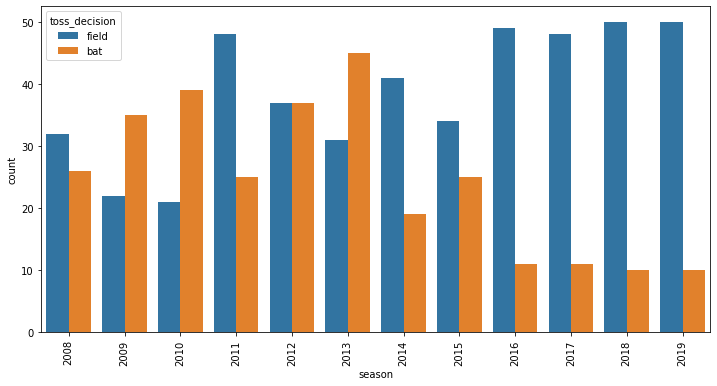

In [41]:
# number of matches played in a season in comparison with toss_decision
plt.figure(figsize= [12,6])
sns.countplot(data = match, x='season', hue = 'toss_decision')
plt.xticks(rotation = 90)
plt.show()

`Inference:` Only in season 2009, 2010, 2013 the number of teams who have chosen for batting first have won in more matches. In 2012 the number of teams who chose to bat or field are equal. In remaining seasons 2008, 2011,2014, 2015, 2016, 2017, 2018, 2019, maximum number of teams have won maximum matches.

In [42]:
# Number of matches played in a season
match.groupby('season')[['id']].count().sort_values('id', ascending = False)

,id
season,
2013,76
2012,74
2011,73
2010,60
2014,60
2016,60
2018,60
2019,60
2015,59


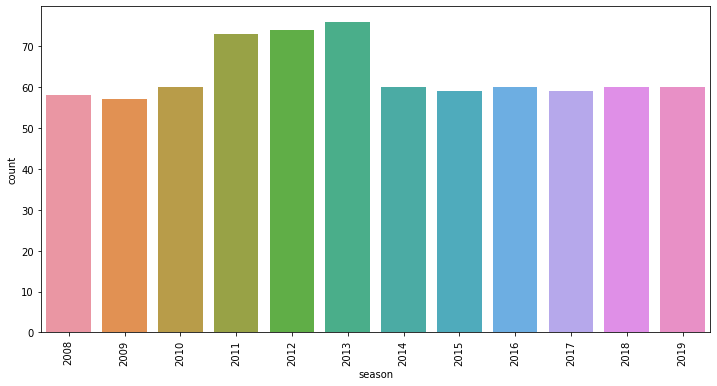

In [43]:
# number of matches played in a season
plt.figure(figsize= [12,6])
sns.countplot(data = match, x='season')
plt.xticks(rotation = 90)
plt.show()

`Inference:` Maximum number of matches played in the season:
1. 2013: 76 matches
2. 2012: 74 matches 
3. 2011: 73 matches

In [44]:
# Finding the winner of each season and storing it in separate dataframe
final_match = match.groupby('season').tail(1)
final_match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,Mumbai Indians,1.0,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,0.0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Deccan Chargers,6.0,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,22.0,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,58.0,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel


In [45]:
# Finding the winner of each season
final_match[['season','winner']].sort_values('season')

,season,winner
116,2008,Rajasthan Royals
173,2009,Deccan Chargers
233,2010,Chennai Super Kings
306,2011,Chennai Super Kings
380,2012,Kolkata Knight Riders
456,2013,Mumbai Indians
516,2014,Kolkata Knight Riders
575,2015,Mumbai Indians
635,2016,Sunrisers Hyderabad
58,2017,Mumbai Indians


No handles with labels found to put in legend.


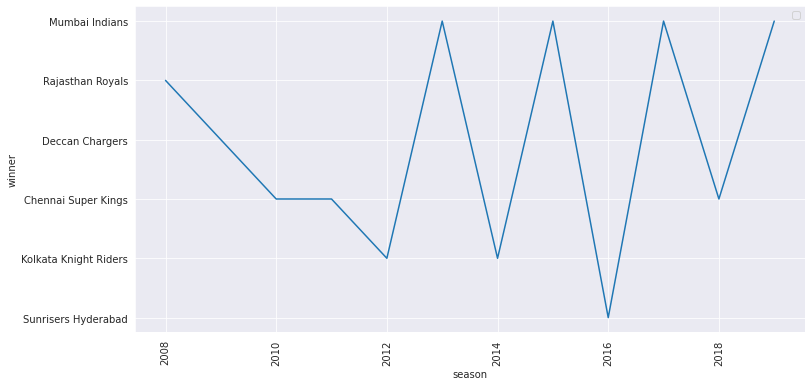

In [46]:
# Plotting the winner of each season
sns.set_style(style = 'darkgrid')
plt.figure(figsize= [12,6])
sns.lineplot(data = final_match, y = 'winner', x= 'season')
plt.xticks(rotation = 90)
plt.legend(loc = 'best')
plt.show()

`Inferences:` From the above plot, it can be said that, 
- 'Mumbai Indians' have won in IPL in four seasons: 2013, 2015, 2017, and 2019.
- 'Chennai Super Kings' in three seasons: 2010, 2011, and 2018
- 'Kolkata Knight Riders' in two season: 2012, and 2014.
- 'Rajasthan Royals', 'Deccan Charges', and 'Sunrises Hyderabad', one each in the season 2008, 2009, and 2016 respectively.

In [47]:
# Checking the player who has got most number of player_of_match
pom = match.groupby('player_of_match')[['id']].count().sort_values('id', ascending = False)

# Looking on first 50 players
pom = pom.head(50)
pom.head(10)

,id
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
RG Sharma,17
DA Warner,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13


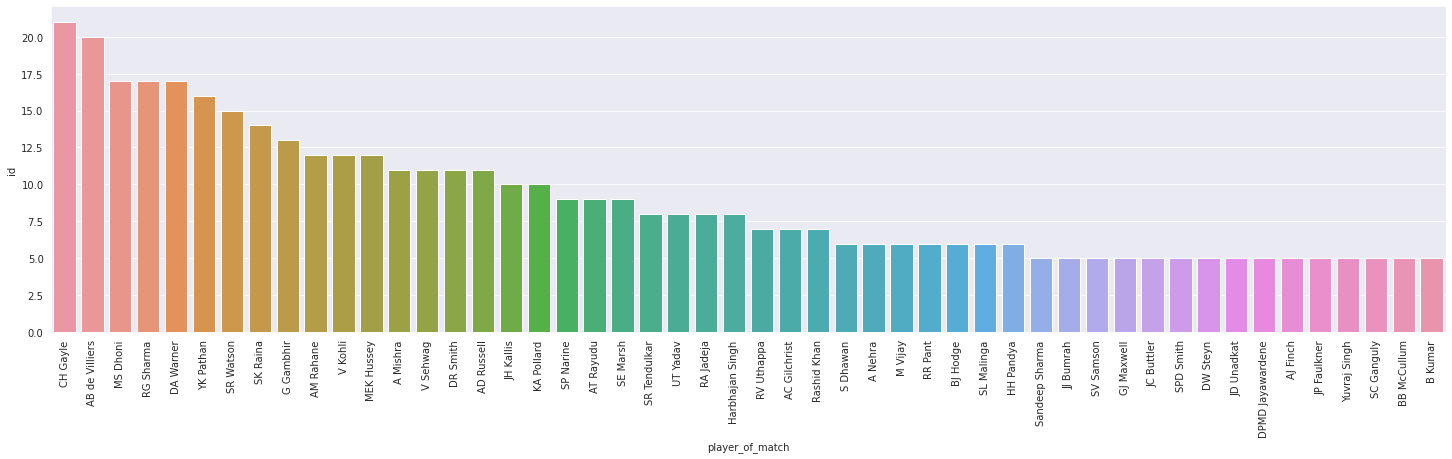

In [48]:
# Plotting the winner of each season
sns.set_style(style = 'darkgrid')
plt.figure(figsize= [25,6])
sns.barplot(data = pom, x = pom.index, y = 'id')
plt.xticks(rotation = 90)
plt.show()

`Inference:`
- The top10 players who has been awarded 'player_of_match' maximum number of times are as follows:
1. Chris Gayle - 21
2. AB de Villiers - 20
3. MS Dhoni - 17
4. RG SHarma - 17
5. DA Warner - 17
6. YK Pathan - 16
7. SR Watson - 15
8. SK Raina - 14
9. G Gambhir - 13
10. AM Rahane - 12

#### Understanding the 2nd Dataset deliveries.csv

In [49]:
# Loading the dataset
delivery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deliveries.csv')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [50]:
# Checking the shape
delivery.shape

(179078, 21)

In [51]:
# Checkign the statistical information of the dataset
delivery.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [52]:
# Checking the information
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

#### Data Cleaning

Handling and Treating Missing Values

In [53]:
# Checking for null values in the dataset
delivery.isnull().sum()/delivery.shape[0]*100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.066954
dismissal_kind      95.066954
fielder             96.399334
dtype: float64

In [54]:
# Dropping columns having higher % of missing values
delivery.drop(delivery.columns[delivery.isnull().sum()/delivery.shape[0]*100>80].tolist(),axis = 1, inplace = True)
delivery.shape

(179078, 18)

In [55]:
# Re-checking for null values 
delivery.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [56]:
# Replacing 'Rising Pune Supergiants' as 'Rising Pune Supergiant', 'Delhi Daredevils' as 'Delhi Capitals'
delivery.batting_team.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'}, inplace = True)
delivery.bowling_team.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'}, inplace = True)

#### Visualising the 2nd Dataset deliveries.csv

In [57]:
# Checking the player who has scored maximum runs
bat = delivery.groupby('batsman')[['batsman_runs']].sum().sort_values('batsman_runs', ascending = False)

# Looking on first 50 players
bat = bat.head(50)
bat.head(10)

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


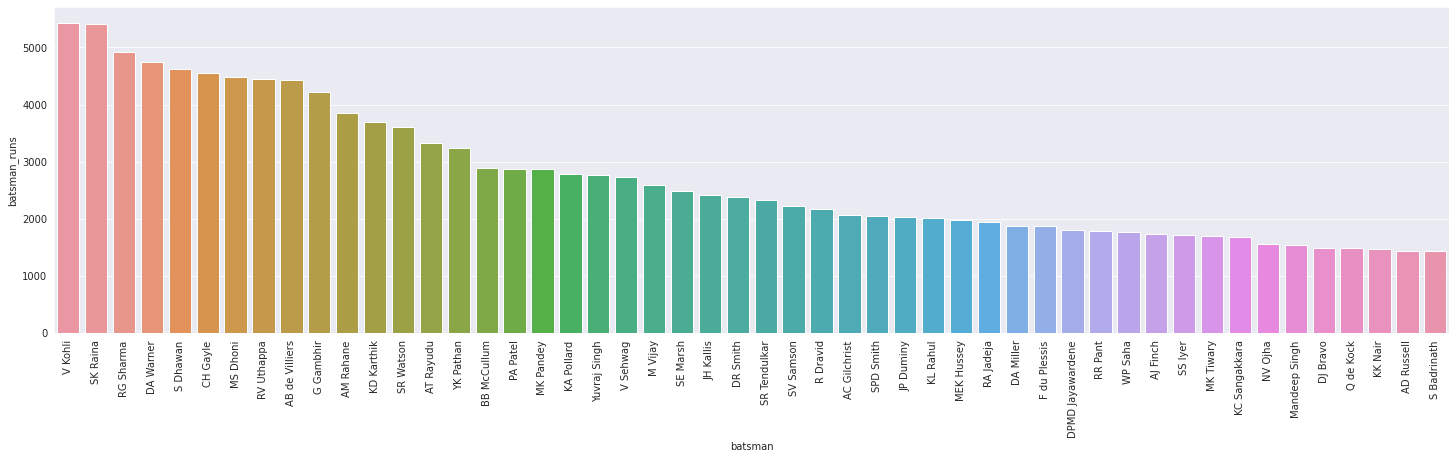

In [58]:
# Plotting the graph for the same
sns.set_style(style = 'darkgrid')
plt.figure(figsize= [25,6])
sns.barplot(data = bat, x = bat.index, y = 'batsman_runs')
plt.xticks(rotation = 90)
plt.show()

`Inference:`

Maximum runs scored by players in entire season (Top 5):
1. V Kohli - 5434
2. SK Raina - 5415
3. RG Sharma - 4914
4. DA Warner - 4741
5. S Dhawan - 4632

In [59]:
# Checking the player who has scored maximum runs in each match and innings
total_match = delivery.groupby(['match_id','inning','batsman'])[['batsman_runs']].count().sort_values('batsman_runs', ascending = False)

# Looking on first 50 players
#total_match = total_match.head(50)
total_match.head(20)

,,,batsman_runs
match_id,inning,batsman,
60,1,BB McCullum,77
171,1,MK Pandey,74
311,1,AM Rahane,72
97,1,SE Marsh,72
200,1,DA Warner,72
247,1,SR Tendulkar,71
592,1,V Kohli,70
7933,2,KL Rahul,70
411,1,CH Gayle,69


`Inference:` Above output shows the number of runs scored by players in each innings.

In [60]:
# Checking bowlers played in maximum number of matches 
total_bowl = delivery.groupby('bowler')[['match_id']].count().sort_values('match_id', ascending = False)

# Looking on first 50 players
total_bowl = total_bowl.head(50)
total_bowl.head(10)

,match_id
bowler,
Harbhajan Singh,3451
A Mishra,3172
PP Chawla,3157
R Ashwin,3016
SL Malinga,2974
DJ Bravo,2711
B Kumar,2707
P Kumar,2637
UT Yadav,2605


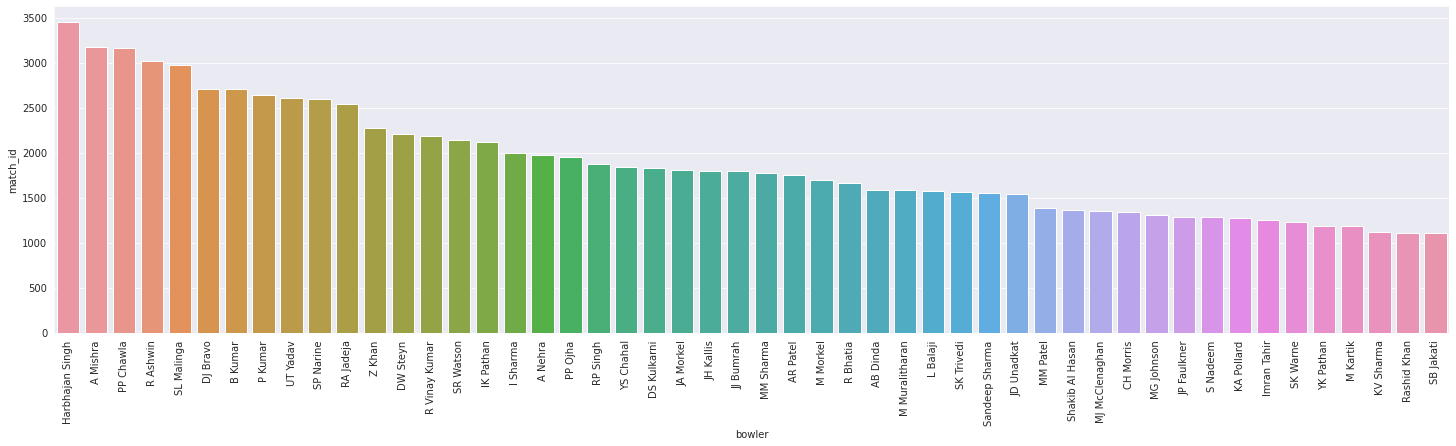

In [61]:
# Plotting the graph for the same
sns.set_style(style = 'darkgrid')
plt.figure(figsize= [25,6])
sns.barplot(data = total_bowl, x = total_bowl.index, y = 'match_id')
plt.xticks(rotation = 90)
plt.show()

`Inference:` 

Maximum matches played by bowlers in entire season (Top 5):

1. Harbhajan Singh
2. A Mishra
3. PP Chawla
4. R Ashwin	
5. SL Malinga

  **`Final Conclusion:`**
Considering the entire season from 2008-2019 following are the conclusions drawn from both datasets:
- ***Successful Teams:*** Mumbai Indians and Chennai Super Kings
- ***Successful Players:*** Chris Gayle, AB De Villiers, MS Dhoni, RG Sharma, DA Warner.

For endorsing company products all teams participating in IPL can be considered but follwing are the team name and player names are from the analysis made.
- ***Teams for Company Endorsements:*** Mumbai Indians, Chennai Super Kings, Royal Challengers Bangalore.
- ***Players for Company Endorsements:*** Players who have played maximum matches, scored maximum runs such as RG Sharma, MS Dhoni, SK Raina, Chris Gayle, AB de Villiers, Virat Kohli, S Dhawan, Harbhajan Singh, PP Chawla and so on.

Factors contributing for win or loss of a team:
- The decision of the toss. Teams who have opted fielding have more chances of winning when compared to batting.
- Also, teams playing in their home grounds have slightly higher chances to win the match.